In [1]:
# ei_net.ipynb
# This notebook is used for testing a network of excitatory and inhibitory units with homeostatic inhibition
# as described in: Moldakarimov, MacClelland and Ermentrout 2006, "A homeostatic rule for inhibitory synapses 
# promotes temporal sharpening and cortical reorganization" PNAS 103(44):16526-16531.

# By Sergio Verduzco Flores        July 2017

from sirasi import *
from matplotlib import pyplot as plt
import numpy as np
import pylab
import time

In [2]:
# create the functions with the gain functions for the E and I units
def make_fe(th, eps): # returns a function as in Eq. 1 of the paper
    return lambda x : np.sqrt( eps * np.log( 1. + np.exp( (x - th)/eps ) ) )
def make_fi(th, eps): # returns a function as in Eq. 2 of the paper
    return lambda x: eps * np.log( 1. + np.exp( (x - th)/eps ) ) 
def make_pulse(t_init, t_end): # return f(t) = 1 if t_init < t < t_end, 0 otherwise
    return lambda t : 1. if (t_init < t and t < t_end) else 0.
def r(i,j,sigma): # A Gaussian function with s.d. sigma applied to i-j
    return (1./(sigma*np.sqrt(2*np.pi))) * np.exp( -0.5*( ((i-j)/sigma)**2 ) )

Execution time: 4.698734521865845 seconds


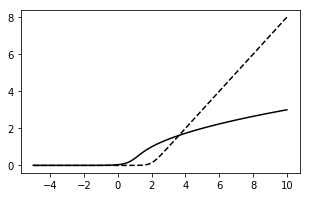

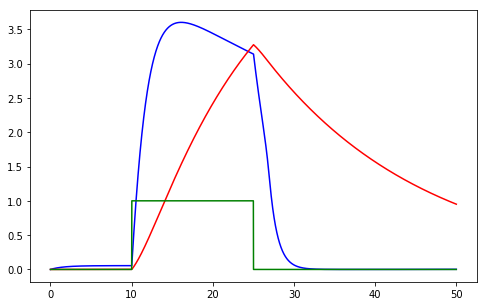

In [3]:
""" Test a single E-I pair, as in figure 2.
    It becomes clear that they may have used different durations for the transient stimulus.
    Moreover, the gain functions don't look the same, even if I match their parameters.
"""
net_params = {'min_delay' : 0.01, 'min_buff_size' : 2, 'rtol':1e-5, 'atol':1e-5 } 
net1 = network(net_params)
# creating the units
exc_params = {'tau' : 1., 'function' : make_fe(1., 0.2), 'type' : unit_types.custom_fi, 'init_val' : 0.0 }
inh_params = {'tau' : 20., 'function' : make_fi(2., 0.2), 'type' : unit_types.custom_fi, 'init_val' : 0.0 }
ext_params = {'init_val' : 0.0, 'function' : make_pulse(10., 25.), 'type' : unit_types.source, }

exc = net1.create(1, exc_params)
inh = net1.create(1, inh_params)
ext = net1.create(1, ext_params)

# connecting the units 
exc2inh_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
exc2exc_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
inh2exc_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
ext2exc_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
ext2inh_conn = {'rule' : 'one_to_one', 'delay' : 0.01}

exc2inh_syn = {'type' : synapse_types.static, 'init_w' : 1.}
exc2exc_syn = {'type' : synapse_types.static, 'init_w' : 3.}
inh2exc_syn = {'type' : synapse_types.static, 'init_w' : -1.2}
ext2exc_syn = {'type' : synapse_types.static, 'init_w' : 5.}
ext2inh_syn = {'type' : synapse_types.static, 'init_w' : 5.}

net1.connect(exc, inh, exc2inh_conn, exc2inh_syn)
net1.connect(exc, exc, exc2exc_conn, exc2exc_syn)
net1.connect(inh, exc, inh2exc_conn, inh2exc_syn)
net1.connect(ext, exc, ext2exc_conn, ext2exc_syn)
net1.connect(ext, inh, ext2inh_conn, ext2inh_syn)

# running the simulation
start_time = time.time()
times, units, empty = net1.run(50.)
print('Execution time: %s seconds' % (time.time() - start_time))

# visualizing
gain_fig = plt.figure(figsize=(5,3))
inps = np.linspace(-5.,10.,100)
exc_fr = np.array([net1.units[exc[0]].f(I) for I in inps])
inh_fr = np.array([net1.units[inh[0]].f(I) for I in inps])
pylab.plot(inps, exc_fr, 'k', inps, inh_fr, 'k--', figure=gain_fig)

act_fig = plt.figure(figsize=(8,5))
pylab.plot(times, units[exc[0]], 'b', times, units[inh[0]], 'r', times, units[ext[0]], 'g', figure=act_fig)
plt.show()


Execution time: 4.725417137145996 seconds


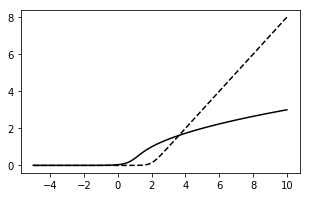

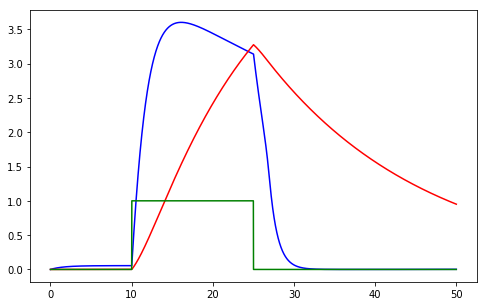

In [4]:
""" A clone of the previous cell, with custom_sc_fi units instead of custom_fi
"""
net_params = {'min_delay' : 0.01, 'min_buff_size' : 2, 'rtol':1e-5, 'atol':1e-5 } 
net1 = network(net_params)
# creating the units
exc_params = {'tau' : 1., 'function' : make_fe(1., 0.2), 'type' : unit_types.custom_sc_fi, 'init_val' : 0.0 }
inh_params = {'tau' : 20., 'function' : make_fi(2., 0.2), 'type' : unit_types.custom_sc_fi, 'init_val' : 0.0 }
ext_params = {'init_val' : 0.0, 'function' : make_pulse(10., 25.), 'type' : unit_types.source, }

exc = net1.create(1, exc_params)
inh = net1.create(1, inh_params)
ext = net1.create(1, ext_params)

# connecting the units 
exc2inh_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
exc2exc_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
inh2exc_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
ext2exc_conn = {'rule' : 'one_to_one', 'delay' : 0.01}
ext2inh_conn = {'rule' : 'one_to_one', 'delay' : 0.01}

exc2inh_syn = {'type' : synapse_types.static, 'init_w' : 1., 'gain' : 1.}
exc2exc_syn = {'type' : synapse_types.static, 'init_w' : 3., 'gain' : 1.}
inh2exc_syn = {'type' : synapse_types.static, 'init_w' : -1.2, 'gain' : 1.}
ext2exc_syn = {'type' : synapse_types.static, 'init_w' : 5., 'gain' : 1.}
ext2inh_syn = {'type' : synapse_types.static, 'init_w' : 5., 'gain' : 1.}

net1.connect(exc, inh, exc2inh_conn, exc2inh_syn)
net1.connect(exc, exc, exc2exc_conn, exc2exc_syn)
net1.connect(inh, exc, inh2exc_conn, inh2exc_syn)
net1.connect(ext, exc, ext2exc_conn, ext2exc_syn)
net1.connect(ext, inh, ext2inh_conn, ext2inh_syn)

# running the simulation
start_time = time.time()
times, units, empty = net1.run(50.)
print('Execution time: %s seconds' % (time.time() - start_time))

# visualizing
gain_fig = plt.figure(figsize=(5,3))
inps = np.linspace(-5.,10.,100)
exc_fr = np.array([net1.units[exc[0]].f(I) for I in inps])
inh_fr = np.array([net1.units[inh[0]].f(I) for I in inps])
pylab.plot(inps, exc_fr, 'k', inps, inh_fr, 'k--', figure=gain_fig)

act_fig = plt.figure(figsize=(8,5))
pylab.plot(times, units[exc[0]], 'b', times, units[inh[0]], 'r', times, units[ext[0]], 'g', figure=act_fig)
plt.show()


Execution time: 181.14943313598633 seconds


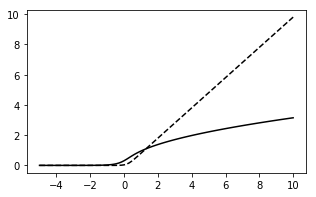

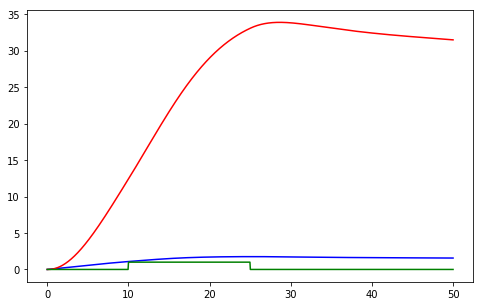

In [5]:
""" Test a network with 20 E-I pairs, as in figure 4.
"""

net_params = {'min_delay' : 0.05, 'min_buff_size' : 2, 'rtol':1e-5, 'atol':1e-5 } 
net2 = network(net_params)
######## creating the units
exc_params = {'tau' : 3., 'function' : make_fe(0.1, 0.2), 'type' : unit_types.custom_fi, 
              'init_val' : 0.0, 'tau_fast' : 0.2 }
inh_params = {'tau' : 5., 'function' : make_fi(0.2, 0.15), 'type' : unit_types.custom_fi, 
              'init_val' : 0.0, 'tau_fast' : 0.2 }
ext_params = {'init_val' : 0.0, 'function' : make_pulse(10., 25.), 'type' : unit_types.source, }

exc = net2.create(20, exc_params)
inh = net2.create(20, inh_params)
ext = net2.create(1, ext_params)

######## connecting the units
# connection specifications
exc2inh_conn = {'rule' : 'all_to_all', 'delay' : 0.05}
exc2exc_conn = {'rule' : 'all_to_all', 'delay' : 0.05}
inh2exc_conn = {'rule' : 'all_to_all', 'delay' : 0.05}
ext2exc_conn = {'rule' : 'all_to_all', 'delay' : 0.05}
ext2inh_conn = {'rule' : 'all_to_all', 'delay' : 0.05}
# synapse specifications
# I don't have the theta and the omega parameters, I assumed theta = 1.8. 
# For omega I used 0.3 . If all weights are equal and add to 2, 20w=2 => w=1/10 => 20w^2=1/5=0.2 .
# lrate can be interpreted as the reciprocal of the synaptic time constants.
exc2inh_syn = {'type' : synapse_types.static, 'init_w' : 1.}
exc2exc_syn = {'type' : synapse_types.sq_hebbsnorm, 'init_w' : 0.1, 'lrate' : 1./300., 'omega' : 0.1}
inh2exc_syn = {'type' : synapse_types.homeo_inh, 'init_w' : -0.1, 'lrate' : 1./150., 
               'des_act' : 1.8, 'gain' : 3.5 }
ext2exc_syn = {'type' : synapse_types.static, 'init_w' : 5.}
ext2inh_syn = {'type' : synapse_types.static, 'init_w' : 5.}

# neuron-to-neuron connection
sig = 3.; g_ee=5.; g_ie=1.
base_e = exc[0] # index of first excitatory unit
base_i = inh[0]
for e,i in zip(exc,inh):
    net2.connect([i], [e], inh2exc_conn, inh2exc_syn) # inhibitory units only connect locally
    for target_e, target_i in zip(exc,inh):
        exc2exc_syn['gain'] = g_ee * r(e, target_e, 3.)
        net2.connect([e], [target_e], exc2exc_conn, exc2exc_syn)
        exc2inh_syn['gain'] = g_ie * r(e-base_e, target_i-base_i, 3.)
        net2.connect([e], [target_i], exc2inh_conn, exc2inh_syn)
        
# external input connections
net2.connect(ext, [exc[9]], ext2exc_conn, ext2exc_syn)
net2.connect(ext, [inh[9]], ext2inh_conn, ext2inh_syn)

# running the simulation
start_time = time.time()
times, units, empty = net2.run(50.)
print('Execution time: %s seconds' % (time.time() - start_time))

# visualizing
gain_fig = plt.figure(figsize=(5,3))
inps = np.linspace(-5.,10.,100)
exc_fr = np.array([net2.units[exc[0]].f(I) for I in inps])
inh_fr = np.array([net2.units[inh[0]].f(I) for I in inps])
pylab.plot(inps, exc_fr, 'k', inps, inh_fr, 'k--', figure=gain_fig)

act_fig = plt.figure(figsize=(8,5))
pylab.plot(times, units[exc[0]], 'b', times, units[inh[0]], 'r', times, units[ext[0]], 'g', figure=act_fig)
plt.show()

In [6]:
3.5/20

0.175